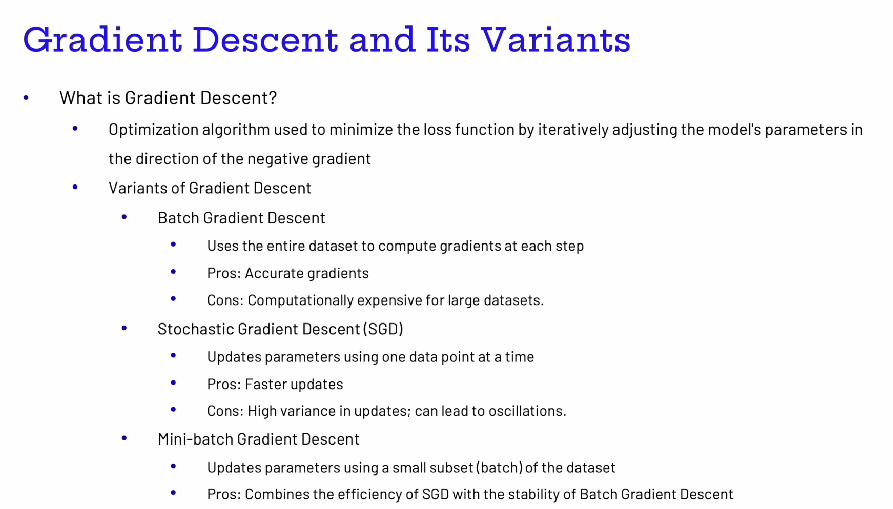
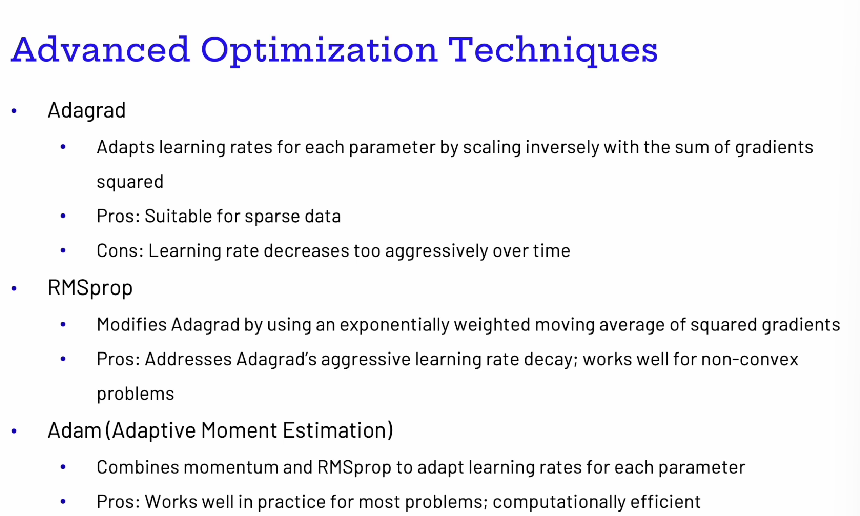
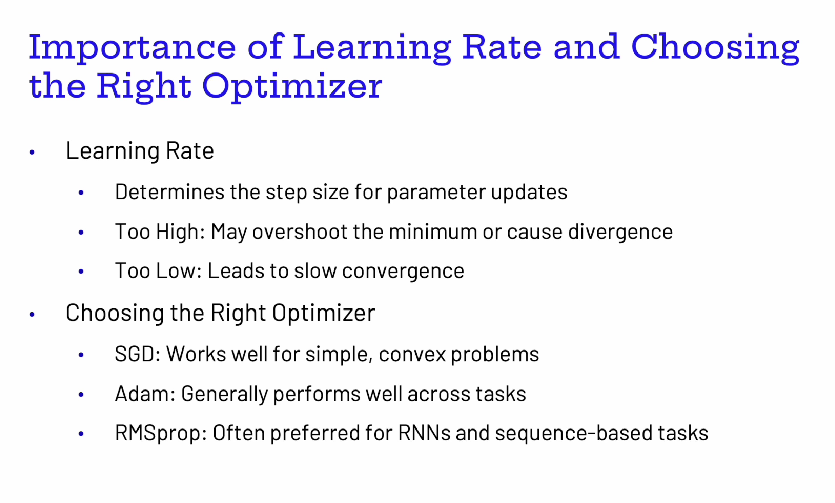

In [1]:
import numpy as np 
import matplotlib.pyplot as plt    


Text(0.5, 1.0, 'Generate dataset')

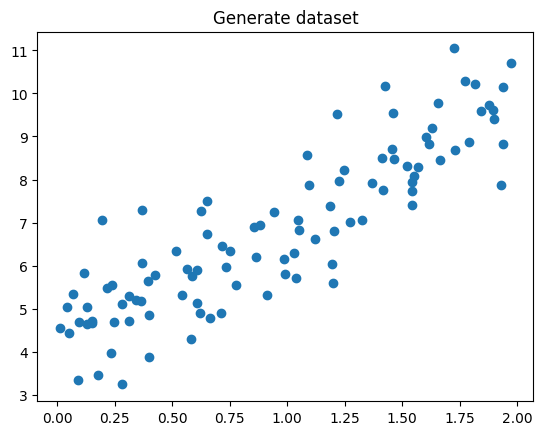

In [4]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 *x + np.random.randn(100,1)
plt.scatter(x,y)
plt.title('Generate dataset')

In [6]:
# Initialize parameters 

m = 100
theta = np.random.rand(2,1)
learning_rate = 0.1
iterations = 1000

x_b =np.c_[np.ones((m,1)), x]

for iteration in range(iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta -= learning_rate *gradients

print("Optimized parameters (theta): \n ", theta)

Optimized parameters (theta): 
  [[4.21509616]
 [2.77011339]]


In [7]:
import tensorflow as tf   


In [8]:
x_tensor = tf.constant(x, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

# define the model 
class LinearModel (tf.Module):
        def __init__(self):
            self.weights = tf.Variable(tf.random.normal([1]))
            self.bias = tf.Variable(tf.random.normal([1]))
        
        def __call__(self, x):
            return self.weights  *x + self.bias
        
def mse_loss (y_true, y_predict):
    return tf.reduce_mean(tf.square(y_true - y_predict)
                          )

In [9]:
model = LinearModel()
optimizer = tf.optimizers.SGD(learning_rate=0.1)
for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(x_tensor)
        loss = mse_loss(y_tensor, y_pred)
    gradients = tape.gradient(loss,[model.weights, model.bias])
    optimizer.apply_gradients(zip(gradients,[model.weights,model.bias]))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, loss: {loss.numpy():.4f}")
        

Epoch 0, loss: 83.5305
Epoch 10, loss: 1.5315
Epoch 20, loss: 1.1690
Epoch 30, loss: 0.9883
Epoch 40, loss: 0.8976
Epoch 50, loss: 0.8522
Epoch 60, loss: 0.8295
Epoch 70, loss: 0.8181
Epoch 80, loss: 0.8123
Epoch 90, loss: 0.8095


In [10]:
import torch 
import torch.nn as nn 
import torch.optim as optim 

In [13]:
x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

class LinearModelTorch (nn.Module):
        def __init__(self):
            super(LinearModelTorch, self).__init__()
            self.linear = nn.Linear(1,1)
        
        def forward(self,x):
            return self.linear(x)
        
model_torch = LinearModelTorch()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.1)

for epoch in range(100):
    optimizer.zero_grad()
    outputs = model_torch(x_torch)
    loss = criterion(outputs, y_torch)
    loss.backward()
    optimizer.step()
    if epoch % 10 ==0 :
        print(f"Epoch {epoch}, loss: {loss.item():.4f}")
    


Epoch 0, loss: 42.5769
Epoch 10, loss: 20.7539
Epoch 20, loss: 7.8041
Epoch 30, loss: 2.2644
Epoch 40, loss: 0.9777
Epoch 50, loss: 0.9978
Epoch 60, loss: 1.0167
Epoch 70, loss: 0.9403
Epoch 80, loss: 0.8930
Epoch 90, loss: 0.8791
